In [1]:
import os
import cv2
import random
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier


In [2]:
Data_path = "/content/drive/MyDrive/CVPR/test"
Test_path = "/content/drive/MyDrive/CVPR/New folder"

cat = os.listdir(Data_path)
Train_data = []

# Load and preprocess training data
for c in cat:
    path = os.path.join(Data_path, c)
    for img in tqdm(os.listdir(path)):
        img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        img_arr_resize = cv2.resize(img_arr, (32, 32))  # Resized to 32x32
        # Flatten the image into a 1D array
        img_arr_flat = img_arr_resize.flatten()
        Train_data.append((img_arr_flat, cat.index(c)))

random.shuffle(Train_data)
# Prepare X and Y for training data
X = [item[0] for item in Train_data]
Y = [item[1] for item in Train_data]



100%|██████████| 1000/1000 [00:15<00:00, 64.99it/s]


In [3]:
Test_data = []

# Load and preprocess test data
for c in cat:
    path = os.path.join(Test_path, c)
    for img in tqdm(os.listdir(path)):
        img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        img_arr_resize = cv2.resize(img_arr, (32, 32))  # Resized to 32x32
        # Flatten the image into a 1D array
        img_arr_flat = img_arr_resize.flatten()
        Test_data.append((img_arr_flat, cat.index(c)))
random.shuffle(Test_data)

100%|██████████| 244/244 [00:02<00:00, 117.05it/s]


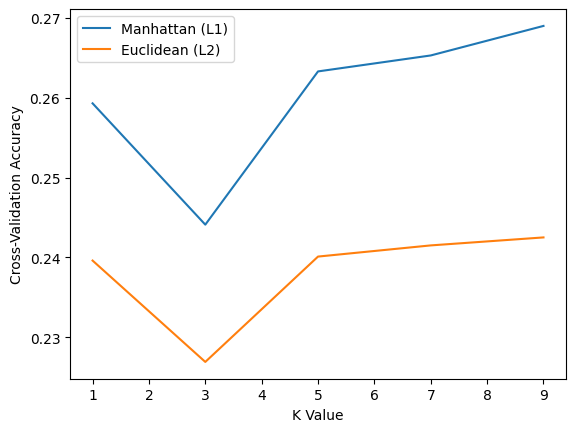

K = 1, Manhattan Accuracy: 0.2593, Euclidean Accuracy: 0.23959999999999998
K = 3, Manhattan Accuracy: 0.24409999999999998, Euclidean Accuracy: 0.22690000000000002
K = 5, Manhattan Accuracy: 0.2633, Euclidean Accuracy: 0.24009999999999998
K = 7, Manhattan Accuracy: 0.26530000000000004, Euclidean Accuracy: 0.2415
K = 9, Manhattan Accuracy: 0.269, Euclidean Accuracy: 0.24250000000000002


In [ ]:
# Initialize a list to store the results
results_manhattan = []
results_euclidean = []

# Define a range of K values to experiment with
k_values = [1, 3, 5, 7, 9]

# Perform 5-fold cross-validation for each K value using Manhattan and Euclidean distances
for k in k_values:
    knn_manhattan = KNeighborsClassifier(n_neighbors=k, p=1)  # Manhattan distance
    knn_euclidean = KNeighborsClassifier(n_neighbors=k, p=2)  # Euclidean distance

    # Perform cross-validation for both distance metrics
    kfold = KFold(n_splits=5)  # Define the cross-validation method
    scores_manhattan = cross_val_score(knn_manhattan, X, Y, cv=kfold)
    scores_euclidean = cross_val_score(knn_euclidean, X, Y, cv=kfold)


    results_manhattan.append(np.mean(scores_manhattan))
    results_euclidean.append(np.mean(scores_euclidean))
# Plot the results
plt.plot(k_values, results_manhattan, label='Manhattan (L1)')
plt.plot(k_values, results_euclidean, label='Euclidean (L2)')
plt.xlabel('K Value')
plt.ylabel('Cross-Validation Accuracy')
plt.legend()
plt.show()

# Print and compare the results
for i, k in enumerate(k_values):
    print(f"K = {k}, Manhattan Accuracy: {results_manhattan[i]}, Euclidean Accuracy: {results_euclidean[i]}")



After evaluating our model using 5-fold cross-validation, the results show that the k-nearest neighbors (K-NN) algorithm achieved :
K = 1, Manhattan Accuracy: 0.2593, Euclidean Accuracy: 0.23959999999999998
K = 3, Manhattan Accuracy: 0.24409999999999998, Euclidean Accuracy: 0.22690000000000002
K = 5, Manhattan Accuracy: 0.2633, Euclidean Accuracy: 0.24009999999999998
K = 7, Manhattan Accuracy: 0.26530000000000004, Euclidean Accuracy: 0.2415
K = 9, Manhattan Accuracy: 0.269, Euclidean Accuracy: 0.24250000000000002

Manhattan (L1) distance is recognized for its robustness in handling outliers and its effectiveness in high-dimensional feature spaces. In the case of the CIFAR-10 dataset, which consists of grayscale images, Manhattan distance is particularly well-suited. It adeptly captures variations in pixel intensities, crucial for distinguishing objects in the images.

On the other hand, Euclidean (L2) distance considers both the magnitude and direction of differences between data points. This metric is more suitable when there are correlations or geometric structures in the data. However, it's sensitive to outliers and may not perform as well in high-dimensional spaces.

Given the characteristics of the CIFAR-10 dataset, where images represent various objects, the robustness of Manhattan (L1) distance to outliers and its ability to capture pixel intensity variations make it a better fit for this grayscale dataset. These variations contain crucial information for distinguishing different object classes, and Manhattan distance captures them effectively.

While our approach has yielded valuable insights, there are opportunities for improvement. Considering alternative distance metrics, such as Minkowski or Mahalanobis distances, could enhance classification accuracy. Exploring feature engineering techniques to extract more discriminative image features and dimensionality reduction methods like principal component analysis (PCA) or autoencoders might further improve model performance. Additionally, investigating advanced classification algorithms, like support vector machines (SVM) or deep learning models, could offer alternative approaches to image classification.

In conclusion, Manhattan (L1) distance appears to be a better choice for the grayscale CIFAR-10 dataset. However, further research and experimentation with alternative distance metrics, feature engineering, and advanced algorithms may uncover additional avenues to enhance classification accuracy.

---



---



Test Image 1: 2
Top 5 Predictions:
1: Class 2
2: Class 2
3: Class 1
4: Class 2
5: Class 2




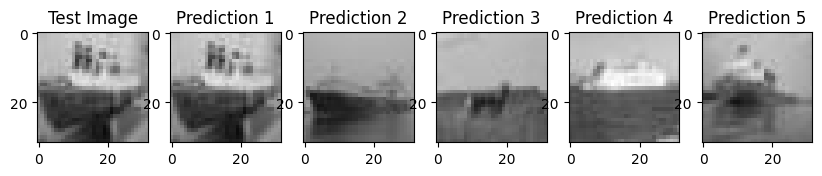

Test Image 2: 5
Top 5 Predictions:
1: Class 5
2: Class 4
3: Class 1
4: Class 0
5: Class 7




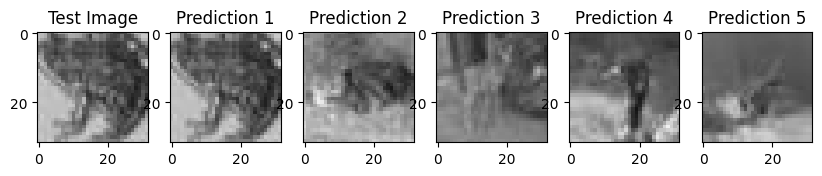

Test Image 3: 8
Top 5 Predictions:
1: Class 8
2: Class 2
3: Class 6
4: Class 2
5: Class 7




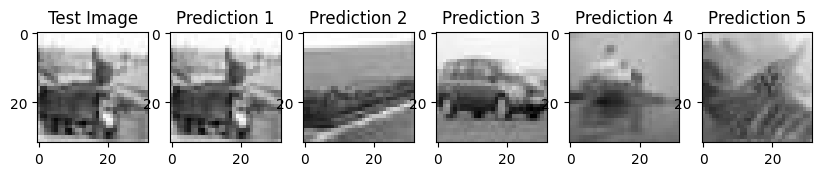

Test Image 4: 0
Top 5 Predictions:
1: Class 0
2: Class 7
3: Class 7
4: Class 7
5: Class 9




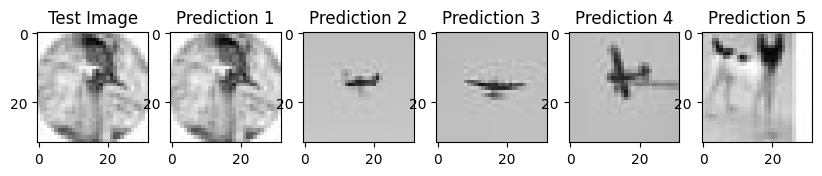

Test Image 5: 2
Top 5 Predictions:
1: Class 2
2: Class 2
3: Class 2
4: Class 2
5: Class 2




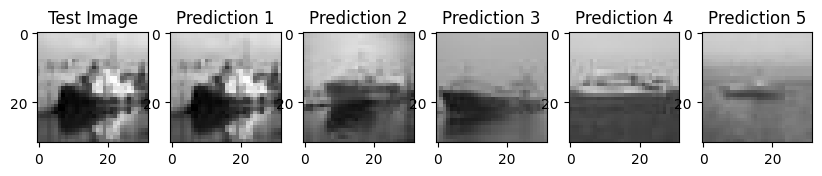

Test Image 6: 4
Top 5 Predictions:
1: Class 4
2: Class 4
3: Class 8
4: Class 3
5: Class 4




In [ ]:
Z = [item[0] for item in Test_data]
test_images = np.array(Z)

k_values = [1, 3, 5, 7, 9]
# Make predictions using the trained k-NN model
knn_model = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
  # Replace with the best hyperparameters
knn_model.fit(X, Y)
predictions = knn_model.predict(test_images)

# Display the top 5 predictions for each test image
for i, test_img in enumerate(Test_data):

    print(f"Test Image {i + 1}: {test_img[1]}")
    print("Top 5 Predictions:")
    distances, indices = knn_model.kneighbors([test_images[i]], n_neighbors=5)
    for j, index in enumerate(indices[0]):
        print(f"{j + 1}: Class {Y[index]}")
    print("\n")

    # Display the test image and its top predictions
    plt.figure(figsize=(10,4))
    plt.subplot(1, 6, 1)
    plt.title("Test Image")
    #img = cv2.imread(image_path)
    original_image = test_img[0].reshape(32,32)

        # Display the original image
    plt.imshow(original_image, cmap='gray', vmin=0, vmax=255)  # Set the correct vmin and vmax values
    # if img is not None:
    #   plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    # else:
    #   print(f"Error loading or displaying image at path: {image_path}")
    for j, index in enumerate(indices[0]):
        plt.subplot(1, 6, j + 2)
        plt.title(f"Prediction {j + 1}")
        # Reshape the flattened image back to (128, 128)
        original_image = X[index].reshape(32,32)

        # Display the original image
        plt.imshow(original_image, cmap='gray', vmin=0, vmax=255)  # Set the correct vmin and vmax values


    plt.show()